#**Downloading the dataset from Kaggle**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amananandrai/ag-news-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ag-news-classification-dataset


# Importing the The Pandas and the Dataset into memory

In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/input/ag-news-classification-dataset/train.csv')

df.head()


,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


# **Columns**
 * Class Index: (Classes of each record)
  * 1-World
  * 2-Sports
  * 3-Business
  * 4-Sci/Tech
 * Title (Contains title of the news articles)
 * Description (Contains description of the news articles)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


# **Preprocessing the text to feed into the ML Model**

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#**Removing Stopwords to lower down biasness**

In [ ]:
sp = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#**Defining Preprocessing Logic to Clean up the text**
#Using Tools like:
 * Regex, NLTK
 * Word Tokenization
 * Word Lemmatization

In [ ]:
def preprocess(text):
  text = re.sub(r'[^a-zA-Z]', ' ', text)
  tokens = nltk.word_tokenize(text.lower())
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in sp and len(word)> 2]
  return ' '.join(tokens)


#**Appying Preprocessing**

In [ ]:
df['description'] = df['Description'].apply(preprocess)
df['title'] = df['Title'].apply(preprocess)

In [ ]:
df_clean = cleaned_df = pd.DataFrame(df[['description','title']])
df_clean.head()

,description,title
0,reuters short seller wall street dwindling ban...,wall bear claw back black reuters
1,reuters private investment firm carlyle group ...,carlyle look toward commercial aerospace reuters
2,reuters soaring crude price plus worry economy...,oil economy cloud stock outlook reuters
3,reuters authority halted oil export flow main ...,iraq halt oil export main southern pipeline re...
4,afp tearaway world oil price toppling record s...,oil price soar time record posing new menace e...


#**Combining the dataframes to vectorize them**

In [ ]:
df['clean_text'] = df['title'] + ' ' + df['description']
df['clean_text'].head()

,clean_text
0,wall bear claw back black reuters reuters shor...
1,carlyle look toward commercial aerospace reute...
2,oil economy cloud stock outlook reuters reuter...
3,iraq halt oil export main southern pipeline re...
4,oil price soar time record posing new menace e...


In [ ]:
# If you combined:
df['text'] = df['clean_text']
df['label'] = df['Class Index']
X = df['text']
y = df['label']

#**Importing the ML tools to perform Classification and Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#**Splitting the Train and Test Datasets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#**Vectorizing the X train, X test Datasets**

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec  = tfidf.transform(X_test)

#**Training the Logistic Regression Model to classify the text into classes**

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

#***Evaluating the performance of logistic regression for multi class classification***:

In [ ]:
preds = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Accuracy: 0.910125
              precision    recall  f1-score   support

           1       0.92      0.90      0.91      6000
           2       0.95      0.98      0.96      6000
           3       0.88      0.88      0.88      6000
           4       0.89      0.89      0.89      6000

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



# **Visualize the most frequent words per category using bar plots**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

def plot_top_words_by_class(df, class_column, text_column, top_n=10):
    classes = df[class_column].unique()

    for category in classes:
        subset = df[df[class_column] == category]
        vectorizer = CountVectorizer(stop_words='english')
        X = vectorizer.fit_transform(subset[text_column])
        word_counts = X.sum(axis=0).A1
        vocab = vectorizer.get_feature_names_out()
        word_freq = dict(zip(vocab, word_counts))

        # Sort and get top N
        top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:top_n])

        # Plot
        plt.figure(figsize=(4, 2))
        plt.bar(top_words.keys(), top_words.values())
        plt.title(f"Top {top_n} Words for Category: {category}")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


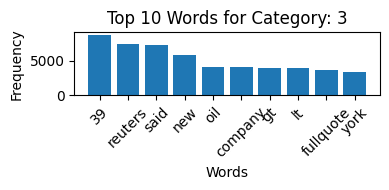

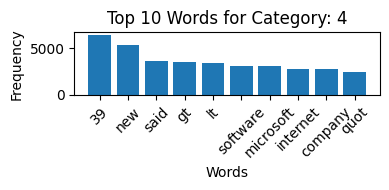

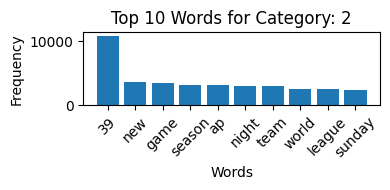

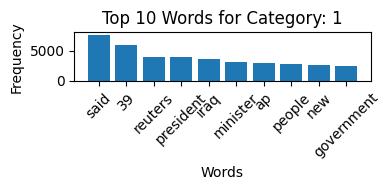

In [ ]:
plot_top_words_by_class(df, class_column='Class Index', text_column='Description', top_n=10)


In [ ]:
from wordcloud import WordCloud

def plot_wordclouds_by_class(df, class_column, text_column):
    classes = df[class_column].unique()

    for category in classes:
        subset = df[df[class_column] == category]
        text = " ".join(subset[text_column])

        wordcloud = WordCloud(
            width=200, height=120, background_color='white', max_words=100
        ).generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud for Category: {category}")
        plt.show()


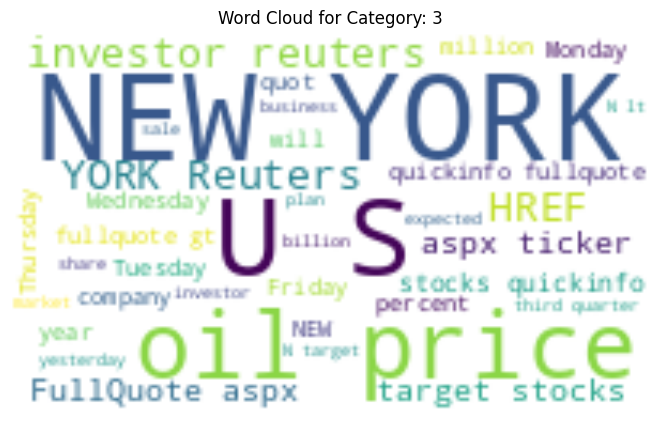

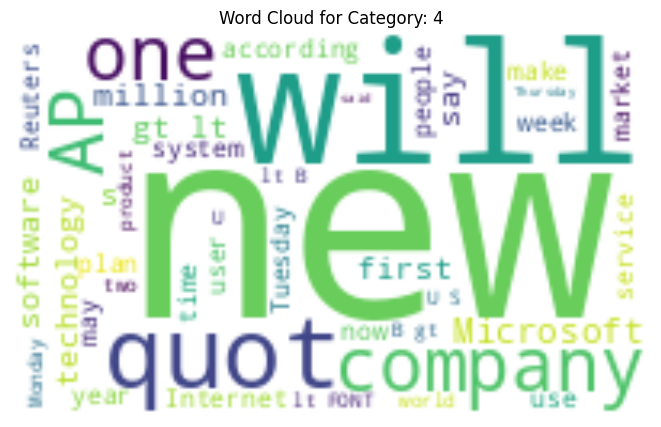

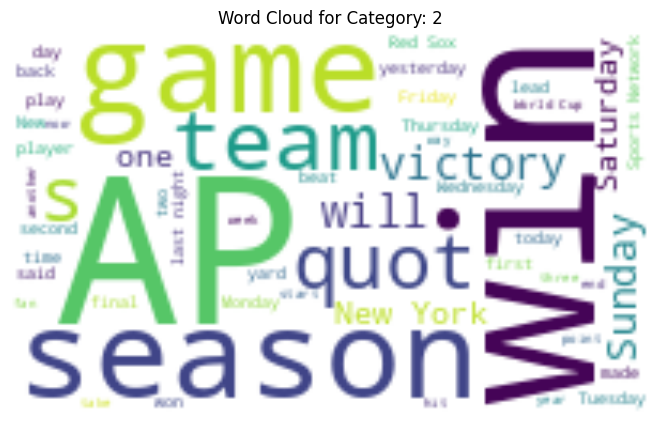

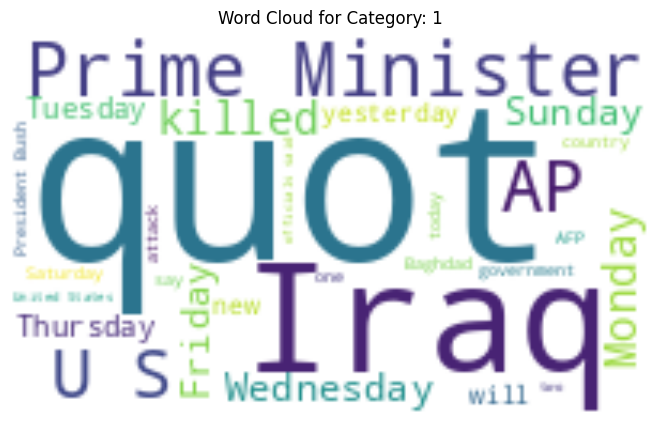

In [ ]:
plot_wordclouds_by_class(df, class_column='Class Index', text_column='Description')